In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import seaborn as sns

In [ ]:
data = pd.read_csv('data/results.csv')

In [ ]:
'''
Total documents
Total word occurrences
Vocabulary size
Words occurring > 1000 times
Words occurring once
'''

total_documents = data.text.count()
# texts = ''.join(data.text).split()
texts = ''.join(data.text).lower()

In [ ]:
# print(collections.Counter([x.lower() for x in ['a', 'b', 'c', 'a', 'b', 'b', 'A', 'B']]))
# pre process text

# REMOVER STOPWORDS?
# remover palavras maior que 3?
# remover palavras com acento?
# removido números

regex = RegexpTokenizer(r'\b[^\d\W]+')
tokens = regex.tokenize(texts)

In [ ]:
# considerar números??
# list(filter(lambda x:len(x)>3, tokens))

In [ ]:
word_counter = collections.Counter(tokens)
total_word_occurrences = sum(word_counter.values())
vocabulary_size = len(word_counter.keys())

In [ ]:
most_frequent_words = len({x: word_counter[x] for x in word_counter if word_counter[x] > 1000})
less_frequent_words = len({x: word_counter[x] for x in word_counter if word_counter[x] == 1})

In [ ]:
table1 = pd.DataFrame(data={'names':[
                            'Total Documents', 
                            'Total word ocurrences', 
                            'Vocabulary size', 
                            'Words occurring > 1000 times', 
                            'Words occurring once'
                            ], 
                   'values':[
                           total_documents, 
                           total_word_occurrences, 
                           vocabulary_size, 
                           most_frequent_words, 
                           less_frequent_words
                           ]
                  })
print(table1)
# print(table1.to_string(index=False, header=False))

In [ ]:
#QUESTAO 2
'''
word, freq, ranking, Pr(%), r.Pr
'''
ranking = 1
words, frequencies, rankings, probs, rprobs = [], [], [], [], []
for k,v in word_counter.most_common():
    prob = round((v/total_word_occurrences) * 100, 2)
    words.append(k)
    frequencies.append(v)
    rankings.append(ranking)
    probs.append(prob)
    rprobs.append(round(ranking * prob / 100, 3))
    ranking += 1

words_statistics = pd.DataFrame()
words_statistics['Word'] = words
words_statistics['Freq'] = frequencies
words_statistics['r'] = rankings
words_statistics['Pr(%)'] = probs
words_statistics['r.Pr'] = rprobs

words_statistics.head(50)

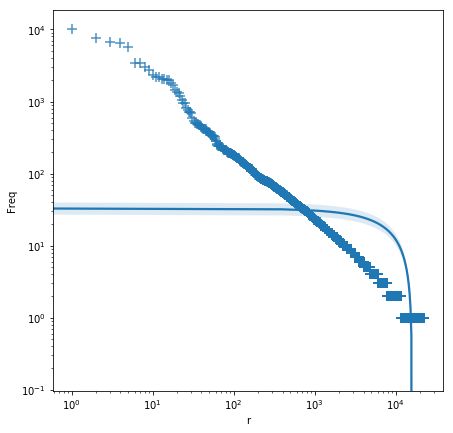

In [12]:
#QUESTAO 3
'''
Plote curvas de rank-frequência (usando escala logarítmica) para palavras e 
bigramas na coleção que você coletou na atividade anterior. 
Quais os melhores valores do parâmetro c para cada curva (5 pts)?
'''

#plot rank-freq palavras

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Freq", words_statistics, ax=ax, marker="+", scatter_kws={"s": 100})

In [ ]:
bigrams = nltk.bigrams(tokens)
f_bigrams = nltk.FreqDist(bigrams)

bigrams_statistics = pd.DataFrame()
bigrams_statistics['Bigram'] = list(f_bigrams.keys())
bigrams_statistics['Freq'] = list(f_bigrams.values())
bigrams_statistics['r'] = bigrams_statistics.Freq.rank(ascending=False, method='first')

bigrams_statistics.r = bigrams_statistics.r.astype(int)
bigrams_statistics.sort_values(by=['Freq'], ascending=False)
bigrams_statistics

# bigram_words,  = []
# for i in f_bigrams:
#     print(i, f_bigrams[i])
# f_bigrams

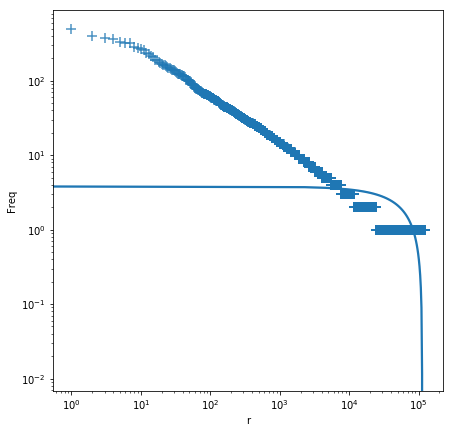

In [76]:
#plot rank-freq bigrams 

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Freq", bigrams_statistics, ax=ax, marker="+", scatter_kws={"s": 100})

In [ ]:
#Quais os melhores valores do parâmetro c para cada curva (5 pts)?